### House Price Prediction

Feature engeneering, EDA

### 1. Understand the Problem Statement & Import Packages and Datasets :

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Source : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [4]:
# Viewing data files present in Path "/HousePrices" :

for dirname,dir,filenames in os.walk('./HousePrices/'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

./HousePrices/data_description.txt
./HousePrices/test.csv
./HousePrices/train.csv


In [61]:
# Loading data from the Path "/HousePrices" 
# Import Data from Excel Files in .csv format and store in Table format called DataFrame using Pandas :
train=pd.read_csv("./HousePrices/train.csv")
test=pd.read_csv("./HousePrices/test.csv")

### 2. Perform EDA (Exploratory Data Analysis) - Understanding the Datasets :

#### 2.1 Explore Train and Test Data and get to know what each Column / Feature denotes :

In [40]:
# Python Method 1 : Displays Data Information :

def display_data_information(data,data_types,dataframe_name):
    print("Information of ",dataframe_name,": Rows = ",data.shape[0], "| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for variable in data_types:
        data_type = data.select_dtypes(include=[variable]).dtypes
        if len(data_type) > 0:
            #print(str(len(data_type))+" "+variable +" Features\n"+str(data_type)+"\n")
            print(str(len(data_type))+" "+variable +" Features")


data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
display_data_information(train,data_types,"train")

Information of  train : Rows =  1460 | Columns =  81 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 1

In [41]:
# Python Method 2 : Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table) :

def display_head_tail(data,head_rows,tail_rows):
    display("Data Head and Tail : ")
    display(data.head(head_rows).append(data.tail(tail_rows)))

# Displays Data Head (Top Rows) and Tail (Bottom Rows) of the Dataframe (Table)

display_head_tail(train, head_rows=3, tail_rows=2)

'Data Head and Tail : '

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [42]:
# Python Method 3 : Displays Data Description using Statistics :

def data_features_dtypes(data):
    numeric_features = data.select_dtypes(include=[np.number])
    categorical_features = data.select_dtypes(include=[np.object])
    return numeric_features,categorical_features

def display_data_description(data):
    print("Data Description : ")
    display(data.describe(include=[np.number]))
    numeric_features = data.select_dtypes(include=[np.number])
    print("The Identified Numeric Features are : \n", numeric_features.columns)

    print(" ")
    display(data.describe(include=[np.object]))
    categorical_features = data.select_dtypes(include=[np.object])
    print("The Identified Caterogical Features are :\n", categorical_features.columns)

    return numeric_features,categorical_features
# Display Data Description of "Train/test" :

numeric_features,categorical_features = display_data_description(train)


Data Description : 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The Identified Numeric Features are : 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


The Identified Caterogical Features are :
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [43]:
display_data_description(test)

Data Description : 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


The Identified Numeric Features are : 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


The Identified Caterogical Features are :
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


(        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
 0     1461          20         80.0    11622            5            6   
 1     1462          20         81.0    14267            6            6   
 2     1463          60         74.0    13830            5            5   
 3     1464          60         78.0     9978            6            6   
 4     1465         120         43.0     5005            8            5   
 ...    ...         ...          ...      ...          ...          ...   
 1454  2915         160         21.0     1936            4            7   
 1455  2916         160         21.0     1894            4            5   
 1456  2917          20        160.0    20000            5            7   
 1457  2918          85         62.0    10441            5            5   
 1458  2919          60         74.0     9627            7            5   
 
       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
 0          1961       

#### 3. Remove Duplicate Rows from Train data if present 

In [9]:
# Python Method 4 : Removes Data Duplicates while Retaining the First one - Similar to SQL DISTINCT :

def remove_duplicates(data):
    print("BEFORE REMOVING DUPLICATES - No. of Rows = ",data.shape[0])
    data.drop_duplicates(keep="first",inplace=True)
    print("AFTER REMOVING DUPLICATES  - No. of Rows = ",data.shape[0])
    return data

# Remove Duplicates from "train" data :

train = remove_duplicates(train)

BEFORE REMOVING DUPLICATES - No. of Rows =  1460
AFTER REMOVING DUPLICATES  - No. of Rows =  1460


In [10]:
# Python Method 6 : Displays Unique Values in Each Column of the Dataframe(Table) :

def display_unique(data,feature_dtype):

    numeric_features,categorical_features = data_features_dtypes(data)
    if feature_dtype=="categorical":
        columns = categorical_features.columns
        print("Total Number of"+" categorical is",len(columns))
    elif feature_dtype=="numerical":
        columns = numeric_features.columns
        print("Total Number of"+" numerical is",len(columns))
    else:
        print("Feature Dtype is not supported!!!")

    

    for column in columns:
        print("No of Unique Values in "+column+" Column are : "+str(data[column].nunique()))
        
display_unique(train,"numerical")
# display_unique(train,"categorical")

Total Number of numerical is 38
No of Unique Values in Id Column are : 1460
No of Unique Values in MSSubClass Column are : 15
No of Unique Values in LotFrontage Column are : 110
No of Unique Values in LotArea Column are : 1073
No of Unique Values in OverallQual Column are : 10
No of Unique Values in OverallCond Column are : 9
No of Unique Values in YearBuilt Column are : 112
No of Unique Values in YearRemodAdd Column are : 61
No of Unique Values in MasVnrArea Column are : 327
No of Unique Values in BsmtFinSF1 Column are : 637
No of Unique Values in BsmtFinSF2 Column are : 144
No of Unique Values in BsmtUnfSF Column are : 780
No of Unique Values in TotalBsmtSF Column are : 721
No of Unique Values in 1stFlrSF Column are : 753
No of Unique Values in 2ndFlrSF Column are : 417
No of Unique Values in LowQualFinSF Column are : 24
No of Unique Values in GrLivArea Column are : 861
No of Unique Values in BsmtFullBath Column are : 4
No of Unique Values in BsmtHalfBath Column are : 3
No of Unique 

In [44]:
numeric_features,categorical_features = data_features_dtypes(train)

# Another method:
# for feature in numeric_features:
#     if 'Yr' in feature or 'Year' in feature:
#         print(feature)

year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

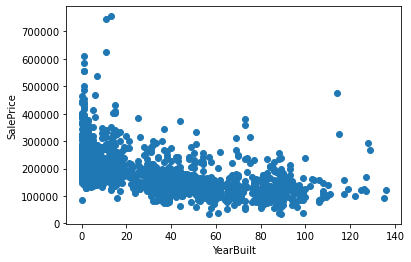

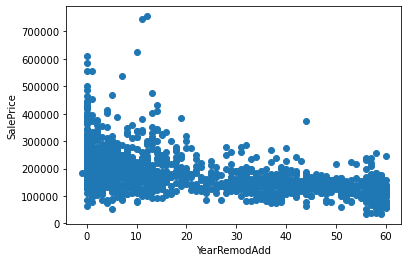

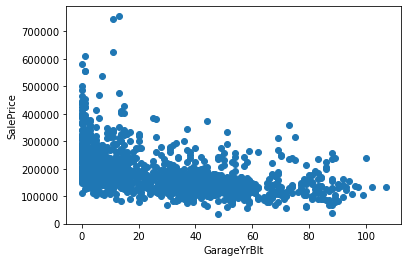

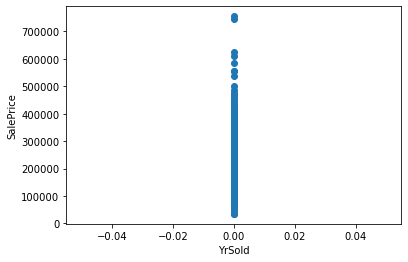

In [45]:
for feature in year_feature:
    data=train.copy()
    plt.scatter(data['YrSold']-data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()



In [68]:
discrete_feature=[feature for feature in numeric_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


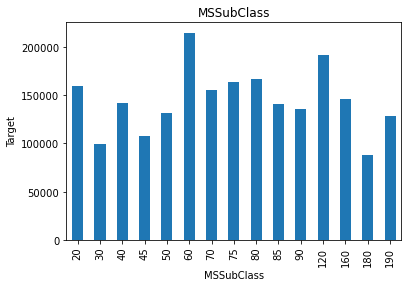

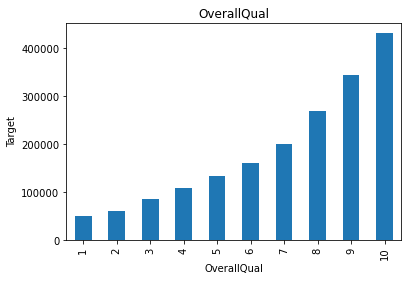

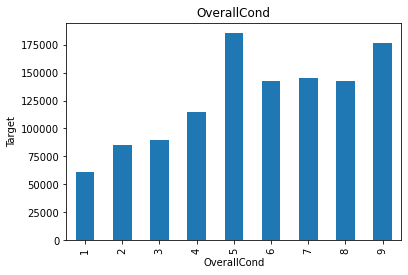

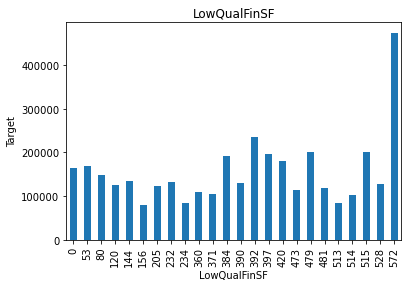

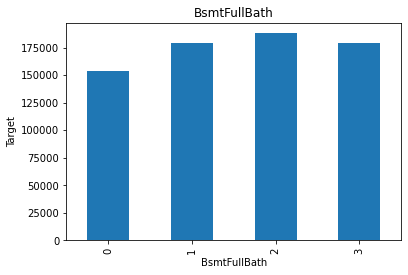

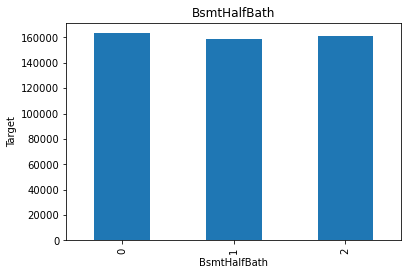

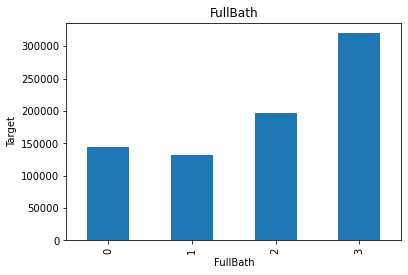

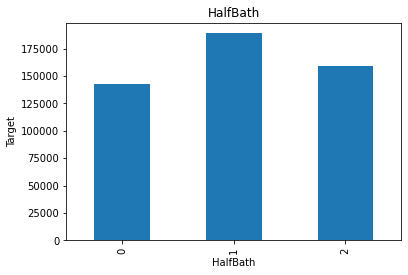

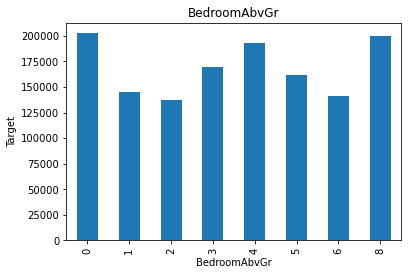

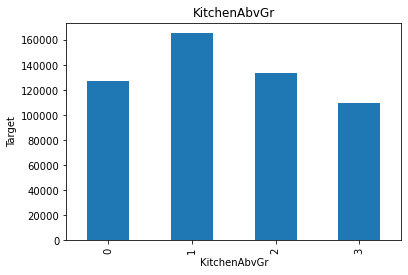

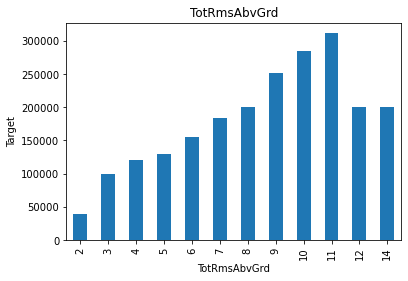

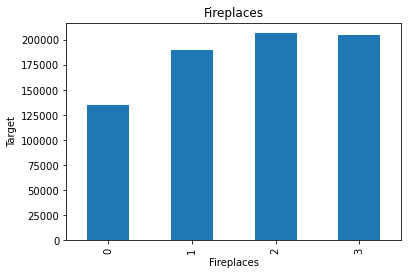

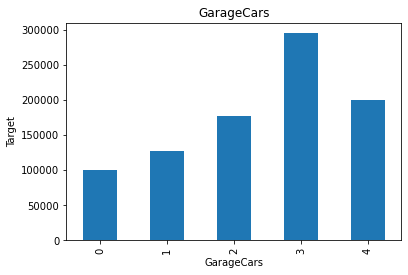

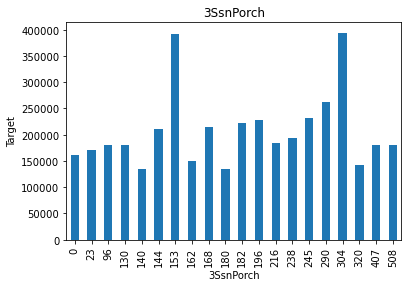

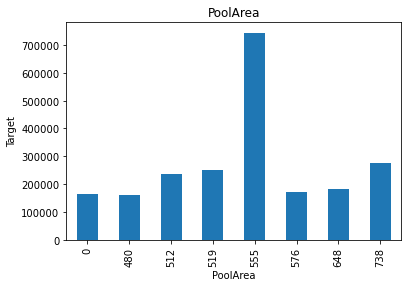

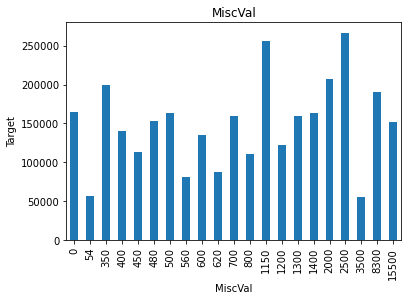

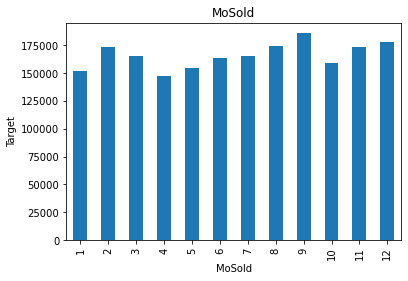

In [69]:
for feature in discrete_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

Duplicates are NOT Found, lets move on with Filling / Imputing Missing Values for each columns.

#### 4. Fill/Impute Missing Values Continuous - Mean/Median/Any Specific Value & Categorical - Others/ForwardFill/BackFill :

In [58]:
# identify the Missing values features, for numerical and categoricalfeatures

def missing_Value_features(data):
    moreNullNum=[]
    nullNum=[]
    moreNullCat=[]
    nullCat=[]
    numeric_features,categorical_features = data_features_dtypes(data)
    num_features_with_na= [ feature for feature in numeric_features.columns if numeric_features[feature].isnull().sum()>0]
    print("The Missing values found for Numerical Data Types :\n")
    for feature in num_features_with_na:
        print(feature, np.round(100*numeric_features[feature].isnull().sum()/data.shape[0],4),"% of Missing values found")
        if np.round(100*numeric_features[feature].isnull().sum()/data.shape[0],4) >=50:
            moreNullNum.append(feature)
        else:
            nullNum.append(feature)
    print("\n")
    print("The Missing values found for Categorical Data Types :\n")
    cat_features_with_na= [ feature for feature in categorical_features.columns if categorical_features[feature].isnull().sum()>0]
    for feature in cat_features_with_na:
        print(feature, np.round(100*categorical_features[feature].isnull().sum()/data.shape[0],4),"% of Missing values found")
        if np.round(100*categorical_features[feature].isnull().sum()/data.shape[0],4) >= 50:
            moreNullCat.append(feature)
        else:
            nullCat.append(feature)
    
    print("\n Features having more  Missing value found for the Numerical Datatype:\n",moreNullNum)
    print("Features having more  Missing value found for the Categorical Datatype:\n",moreNullCat)

    print("Features having less Missing value found for the Numerical Datatype:\n",nullNum)
    print("Features having less Missing value found for the Categorical Datatype:\n",nullCat)

    return nullNum,nullCat
    
nullNum,nullCat = missing_Value_features(train)


The Missing values found for Numerical Data Types :

LotFrontage 17.7397 % of Missing values found
MasVnrArea 0.5479 % of Missing values found
GarageYrBlt 5.5479 % of Missing values found


The Missing values found for Categorical Data Types :

Alley 93.7671 % of Missing values found
MasVnrType 0.5479 % of Missing values found
BsmtQual 2.5342 % of Missing values found
BsmtCond 2.5342 % of Missing values found
BsmtExposure 2.6027 % of Missing values found
BsmtFinType1 2.5342 % of Missing values found
BsmtFinType2 2.6027 % of Missing values found
Electrical 0.0685 % of Missing values found
FireplaceQu 47.2603 % of Missing values found
GarageType 5.5479 % of Missing values found
GarageFinish 5.5479 % of Missing values found
GarageQual 5.5479 % of Missing values found
GarageCond 5.5479 % of Missing values found
PoolQC 99.5205 % of Missing values found
Fence 80.7534 % of Missing values found
MiscFeature 96.3014 % of Missing values found

 Features having more  Missing value found for the Nu

In [62]:
# Remove 'MiscFeature','Fence','PoolQC','Alley','FireplaceQu' from categorical variables.
train=train.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1)

Because the number of missing values for most of the variables is small, let's fill them with the mode. When filling variables with a mode using a loop, an error occurs.

In [60]:
# Python Method 5 : Fills or Imputes Missing values with Various Methods : 

def fill_missing_values(data,fill_value,fill_types,columns,dataframe_name):


    # numeric_features,categorical_features = data_features_dtypes(data)

    # if feature_dtype=="categorical":
    #     columns = categorical_features.columns
    # elif feature_dtype=="numerical":
    #     columns = numeric_features.columns
    # else:
    #     print("Feature Dtype is not supported!!!")

    #try:
    print("Missing Values BEFORE REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())

    for column in columns:

        if "Random_sample_Fill" in fill_types:
            data[column+"_random"]=data[column]
            ##It will have the random sample to fill the na
            random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
            ##pandas need to have same index in order to merge the dataset
            random_sample.index=data[data[column].isnull()].index
            data.loc[data[column].isnull(),column+'_random']=random_sample
            data[column]=data[column+"_random"]
            data.drop([column+"_random"],axis=1,inplace=True)

        if "New_Feature_Importance" in fill_types :
            data[column+'_NAN'] = np.where(data[column].isnull(),1,0)
            data[column].fillna(data[column].median(),inplace=True)

        # Fill missing values with median values: --- > For Numeric features
        if "Median_Fill" in fill_types :
            data[column].fillna(data[column].median(),inplace=True)

        # Fill missing values with Mode values: --- > For Categorical features
        if "Mode_Fill" in fill_types :
            data[column].fillna(data[column].mode()[0],inplace=True)

        # Fill missing values with Specific values: --- > For Numeric/Categorical features
        if "Value_Fill" in fill_types :
            data[column].fillna(fill_value,inplace=True)

        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Forward_Fill" in fill_types :
            data[column].ffill(axis = 0, inplace=True)

        # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)

    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())

        
    return data
    # except:
    #     print("Feature Dtype is not supported!!!")


In [63]:
# Features having less Missing value found for the Categorical Datatype
nullCat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [51]:
# Features having less Missing value found for the Numerical Datatype
nullNum

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [64]:
# fill_missing_values(data,fill_value,fill_types,columns,dataframe_name):


fill_types = [ "Mode_Fill"]
fill_value = 0
# Fills or Imputes Missing values in "Registration_Date" Column with "Forward_Fill" Method in "train" : 
train=fill_missing_values(train, fill_value, fill_types, nullNum ,"train")
train=fill_missing_values(train, fill_value, fill_types, nullCat ,"train")

Missing Values BEFORE REMOVAL in  train  data


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 77, dtype: int64

Missing Values AFTER REMOVAL in  train  data


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

Missing Values BEFORE REMOVAL in  train  data


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

Missing Values AFTER REMOVAL in  train  data


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [65]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [67]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

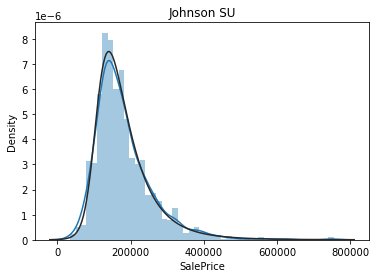

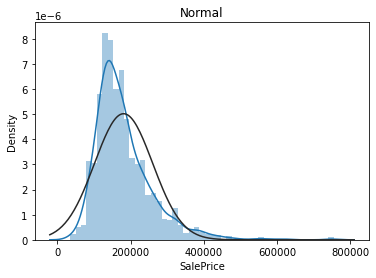

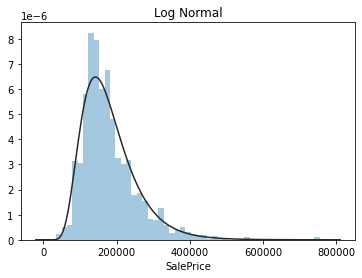

In [72]:
import scipy.stats as st
y = train['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=True, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=True, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

#### 5. Feature Engineering

5.1 Feature Selection - Selection of Most Important Existing Features

5.2 Feature Creation - Creation of New Features from the Existing Features / Predictors :

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['City_Type','Employer_Category']:
    patient_profile[col]= patient_profile[col].astype('str')
    patient_profile[col]= le.fit_transform(patient_profile[col])

In [2]:
def categorical_encoding(data,columns,targetColumn,encodingType,approach):
    if encodingType=="NominalEncoding":
        if "OneHotEncoding" in approach:
            for column in columns:
                data_new = pd.get_dummies(data[column],drop_first=True)
                data = pd.concat([data,data_new],axis=1)
                data.drop(column,axis=1,inplace=True)
        if "OneHotEncodingWithManycatergories" in approach:
            for column in columns:
                lst_10=list(data[column].value_counts().sort_values(ascending=False).head(10).index)
                for categories in lst_10:
                    data[categories]=np.where(data[column]==categories,1,0)
        if "MeanEncoding" in approach:
            for column in columns:
                mean_ordinal=data.groupby([column])[targetColumn].mean().to_dict()
                data[column]=data[column].map(mean_ordinal)


    if encodingType=="OrdinalEncoding":
        if "LabelEncoding" in approach:
            le = LabelEncoder()
            data[columns] = data[columns].apply(le.fit_transform)

        if "TargetGuidedOrdinalEncoding" in approach:
            for column in columns:
                ordinal_labels=data.groupby([column])[targetColumn].mean().sort_values().index
                ordinal_labels={k:i for i,k in enumerate(ordinal_labels)}
                data[column] = data[column].map(ordinal_labels)

    return data


In [ ]:
def scaling_data(data,scalingType):
    if "Standarization" in scalingType:
        scaler = StandardScaler()
        data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
    if "MinMaxs" in scalingType:
        scaler= MinMaxScaler()
        data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
    if "Robust" in scalingType:   
        scaler = RobustScaler()
        data= pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
    return data